<a href="https://colab.research.google.com/github/souhirbenamor/FRM-EM-paper/blob/main/Naive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/BE_P.csv')

df = df.set_index(pd.to_datetime(df['Date']))
df = df.set_index(df.Date)
df.drop(columns = 'Date', inplace = True)
df.drop(df.loc[df[' Prices'].isna()].index, inplace = True)
df.sort_index(inplace = True)

In [ ]:
print(df)

The 'Dumb' Method is our baseline model. This method simply looks at the price now, and believes that 24 hours from now it will be the same price


In [4]:
df['pred_one_day'] = df[' Prices'].shift(+24)
df['difference_one_day'] = (df['pred_one_day'] - df[' Prices']).abs()

In [ ]:
print(df['pred_one_day'])

In [6]:
train_df = df[:-17472]
test_df = df[-17472:]

In [7]:
test_df['one_day_difference_percentage'] = ((test_df['difference_one_day']+1)/(test_df[' Prices']+1))*100

one_day_difference_percentage_average = test_df['one_day_difference_percentage'].mean()
one_day_difference_percentage_average

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


26.684134133914775

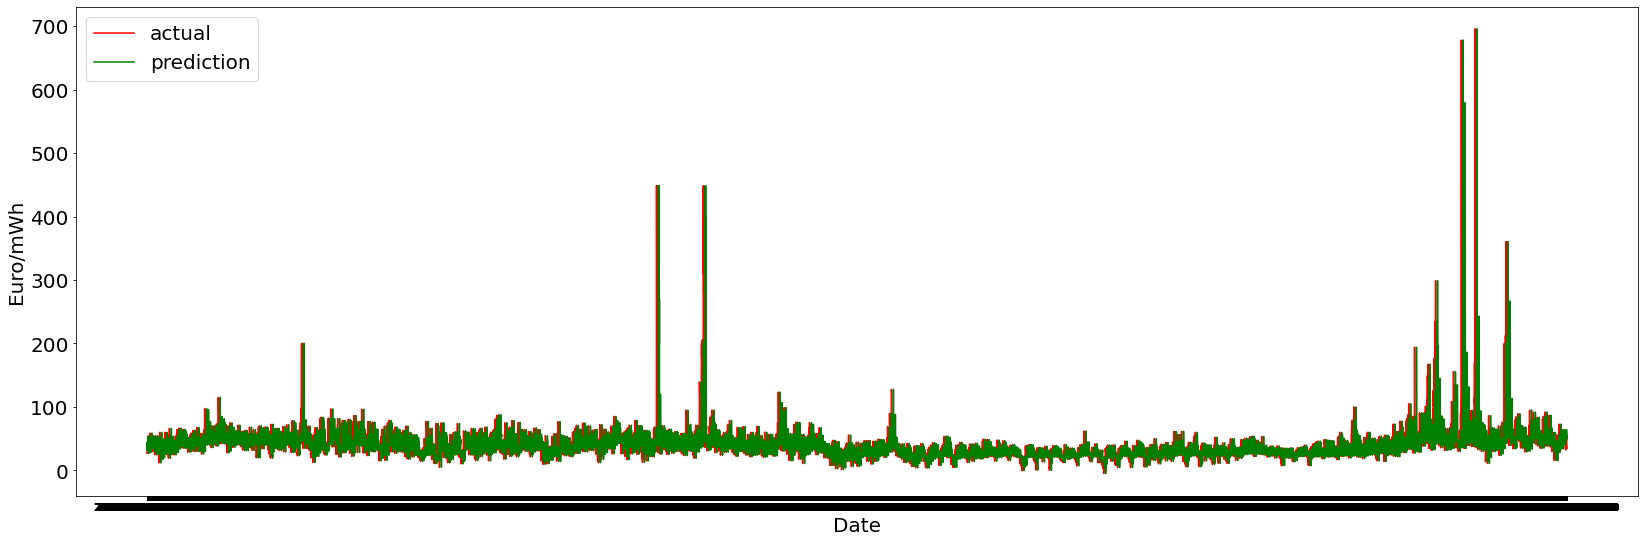

In [8]:
fig, ax = plt.subplots(figsize = (28,9))
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Euro/mWh', fontsize=20)
ax.plot(test_df[' Prices'][2:17472], label = 'actual', color = 'r')
ax.plot(test_df['pred_one_day'][2:17472], label = 'prediction', color = 'g')
ax.tick_params(axis='y', labelsize = 20)

ax.legend(prop={'size': 20})

In [ ]:
# Save prediction Results
df_Prediction=df['pred_one_day']
import pandas as pd
import csv
pd.DataFrame(df_Prediction)
df_Prediction=pd.DataFrame(df_Prediction)
df_Prediction.to_csv("df_Prediction.csv", header=False, quoting=csv.QUOTE_NONE, escapechar=' ')